#### Lindenmayer
Try to recreate a Lindenmayer system (also known as **L-system**, [source](https://en.wikipedia.org/wiki/L-system)). These are systems created via a series of replacement rules. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
def lindenmayer_translation(rules: dict, axiom: list) -> list:
    '''
    Rewrite the symbols within the axiom, according to the provided rules.
    '''

    # Create a nested list containing each symbol within the axiom.
    translation = [[symbol] for symbol in axiom]

    # Iteratve over the axiom.
    for i, symbol in enumerate(axiom):
        # Check whether there is a rule for that particular symbol.
        if symbol in rules.keys():
            # Rewrite the symbol.
            translation[i] = rules[symbol]

    # Return the flattened list
    return (sum(translation, []))

def lindenmeyer(rules: dict, axiom: list, iterations: int) -> list:
    '''
    Execute lindenmayer translation iteratively multiple times.
    '''
    for _ in range(iterations):
        axiom = lindenmayer_translation(rules, axiom)

    return axiom

# Demonstration
ls_rules = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['A'] 
}
ls_axiom = ['A']
print(lindenmeyer(ls_rules, ls_axiom, 5))

['C', 'A', 'A', 'B', 'C']


Now, let's play around with **Koch Snowflakes** :)

Firstly, we will need an auxiliary vector class.

P. S.
Last two functions in the `Vector` class are not really necessary for current task. However, there is a high probability that I will reuse this class in future, so let's make it a bit more functional. :)

In [3]:
class Vector():
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y

    def __str__(self) -> str:
        return f"Vector ({round(self.x, 2)}, {round(self.y, 2)})"

    def __add__(self, other):
        """ Returns the vector addition of self and other """
        if isinstance(other, Vector):
            new_x_y = self.x + other.x, self.y + other.y
        elif isinstance(other, (int, float)):
            new_x_y = self.x + other, self.y + other
        else:
            raise ValueError("Addition with type {} not supported".format(type(other)))
        return self.__class__(*new_x_y)

    def __radd__(self, other):
        """ Called if 4 + self for instance """
        return self.__add__(other)

    def __sub__(self, other):
        """ Returns the vector difference of self and other """
        if isinstance(other, Vector):
            new_x_y = self.x - other.x, self.y - other.y
        elif isinstance(other, (int, float)):
            new_x_y = self.x - other, self.y - other
        else:
            raise ValueError("Subtraction with type {} not supported".format(type(other)))
        return self.__class__(*new_x_y)

    def __rsub__(self, other):
        """ Called if 4 - self for instance """
        return self.__sub__(other)

    def __mul__(self, other):
        """ 
        Returns the dot product of self and other if multiplied
        by another Vector.  If multiplied by an int or float,
        multiplies each component by other.
        """
        if isinstance(other, Vector):
            return self.dot(other)
        elif isinstance(other, (int, float)):
            new_x_y = self.x * other, self.y * other
            return self.__class__(*new_x_y)
        else:
            raise ValueError("Multiplication with type {} not supported".format(type(other)))

    def __rmul__(self, other):
        """ Called if 4 * self for instance """
        return self.__mul__(other)

    def __truediv__(self, other):
        """ Returns the vector division of self and other """
        if isinstance(other, Vector):
            new_x_y = self.x / other.x, self.y / other.y
        elif isinstance(other, (int, float)):
            new_x_y = self.x / other, self.y / other
        else:
            raise ValueError("Division with type {} not supported".format(type(other)))
        return self.__class__(*new_x_y)

    def dot(self, other: "Vector"):
        """ Returns the dot product of self and other Vector """
        return self.x * other.x + self.y * other.y

Now, having the vector class, let's use it to implement Koch Snowflake generator.


![Koch Snowflake Example](img/lindenmayer/koch_snowflake.png)

**L-system**<br>
* variables: $F$
* constants: $+, -$
* axiom: $F--F--F$
* rules: $F→F+F--F+F$

<br>**Drawing rules**<br>

* $F$: go forward with drawing a line segment
* $+$: turn 60° to the left
* $-$: turn 60° to the right

![Koch Snowflake Example](img/lindenmayer/koch_snowflake_pattern.png)

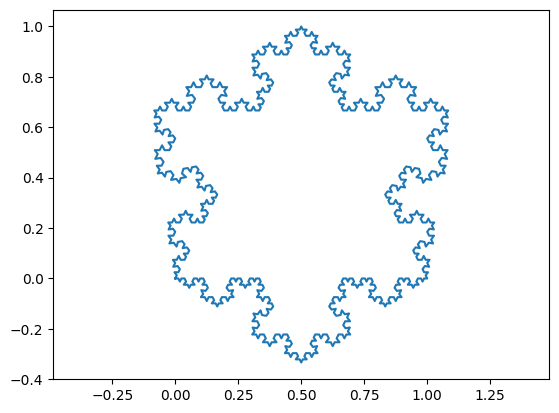

In [4]:
def koch_snowflake_translation(p1: Vector, p2: Vector):
    '''
    Take two points, apply Koch Snowflake rules on them and return 5 points in result (4 line segments).
    '''
    p1_p2_diff = p2 - p1
    rotate = Vector(-p1_p2_diff.y, p1_p2_diff.x)

    n1 = p1 + p1_p2_diff * (1/3) # Place `n1` on 1/3 of the length between `p1` and `p2`
    n2 = p1 + p1_p2_diff * (1/2) + rotate * (1/3) # Place `n2` in the middle between `p1` and `p2` and move it a bit outside
    n3 = p1 + p1_p2_diff * (2/3) # Place `n3` on 2/3 of the length between `p1` and `p2`

    return [p1, n1, n2, n3, p2]  # Return all the 5 points (two old and three new).

def koch_snowflake(iterations: int) -> list:
    # AXIOM: The first triangle - three points.
    p1 = Vector(0.0, 0.0)
    p2 = Vector(0.5, 1.0)
    p3 = Vector(1.0, 0.0)

    # We need to add the first point second time in order to be able to construct all the line segments 
    # (e.g. [last point, first point])
    axiom = [p1, p2, p3, p1]
    # We execute as many iterations, as required. On every iteration we apply the set of rules on each line segment.
    for _ in range(iterations):
        new_points = []

        # For each line segment (pair of two adjacent points) we must apply the L-system rules.
        for (p1, p2) in zip(axiom, axiom[1:]):
            # By Koch rules every line segment converts into 4 line segments (i.e. 2 points convert into 5)
            new_points.extend(koch_snowflake_translation(p1, p2))

        # At the end of the iteration the newly generated figure becomes the axiom for the next iteration.
        axiom = new_points

    return axiom

points = koch_snowflake(4)
x, y = zip(*[(p.x, p.y) for p in points])
plt.plot(x, y)
plt.axis('equal')
plt.show()